In [20]:
from pyforest import*
lazy_imports()

['from xlrd import open_workbook',
 'import nltk',
 'import dash',
 'import bokeh',
 'from scipy import stats',
 'from sklearn.model_selection import KFold',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.impute import SimpleImputer',
 'from scipy import signal as sg',
 'from dask import dataframe as dd',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.linear_model import ElasticNetCV',
 'import datetime as dt',
 'from fbprophet import Prophet',
 'from sklearn.decomposition import PCA',
 'import altair as alt',
 'import spacy',
 'from openpyxl import load_workbook',
 'import pydot',
 'import statistics',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import plotly as py',
 'import seaborn as sns',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import imutils',
 'import xgboost as xgb',
 'from skl

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
train=pd.read_csv('amazontrain.csv')
test=pd.read_csv('amazontest.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [23]:
train.shape

(32769, 10)

In [24]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ACTION,32769.0,0.942110,0.233539,0.0,1.0,1.0,1.0,1.0
RESOURCE,32769.0,42923.916171,34173.892702,0.0,20299.0,35376.0,74189.0,312153.0
MGR_ID,32769.0,25988.957979,35928.031650,25.0,4566.0,13545.0,42034.0,311696.0
ROLE_ROLLUP_1,32769.0,116952.627788,10875.563591,4292.0,117961.0,117961.0,117961.0,311178.0
ROLE_ROLLUP_2,32769.0,118301.823156,4551.588572,23779.0,118102.0,118300.0,118386.0,286791.0
ROLE_DEPTNAME,32769.0,118912.779914,18961.322917,4674.0,118395.0,118921.0,120535.0,286792.0
ROLE_TITLE,32769.0,125916.152644,31036.465825,117879.0,118274.0,118568.0,120006.0,311867.0
ROLE_FAMILY_DESC,32769.0,170178.369648,69509.462130,4673.0,117906.0,128696.0,235280.0,311867.0
ROLE_FAMILY,32769.0,183703.408893,100488.407413,3130.0,118363.0,119006.0,290919.0,308574.0
ROLE_CODE,32769.0,119789.430132,5784.275516,117880.0,118232.0,118570.0,119348.0,270691.0


In [25]:
train.dtypes

ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

In [26]:
train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [27]:
test.shape

(58921, 10)

In [28]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [19]:
train.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [29]:
train['MGR_ID'].value_counts()

770      152
2270      99
2594      82
1350      71
2014      67
        ... 
97000      1
81506      1
12517      1
50296      1
22355      1
Name: MGR_ID, Length: 4243, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

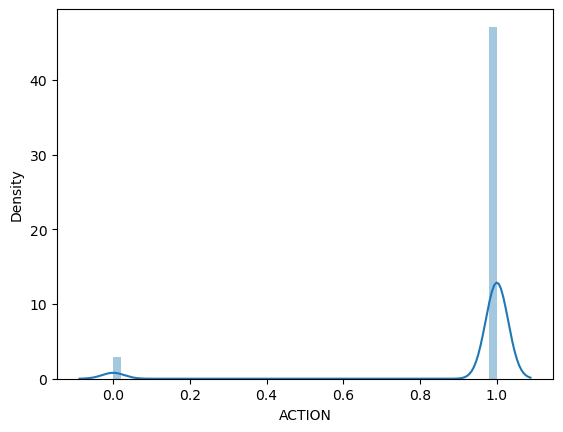

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

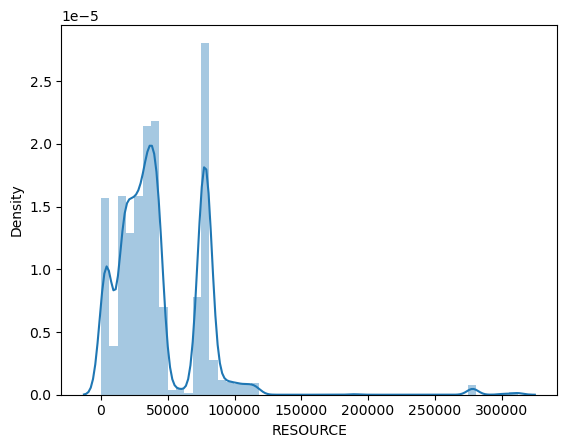

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

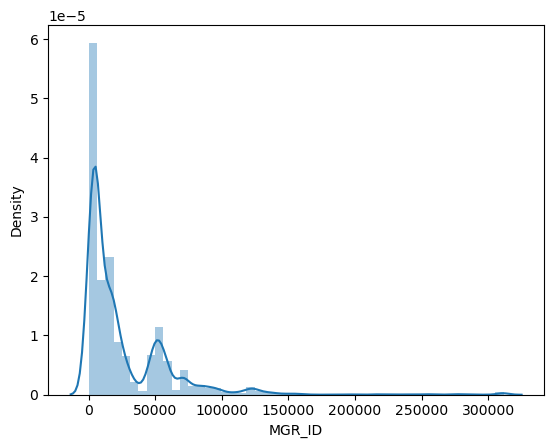

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

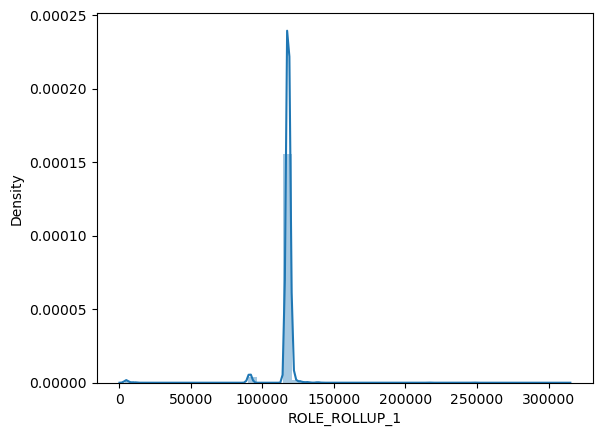

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

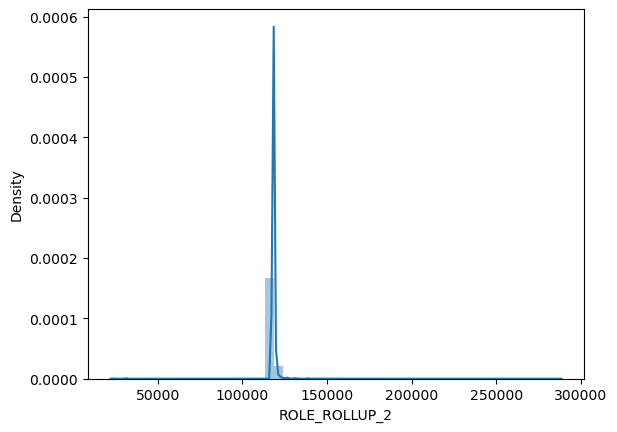

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

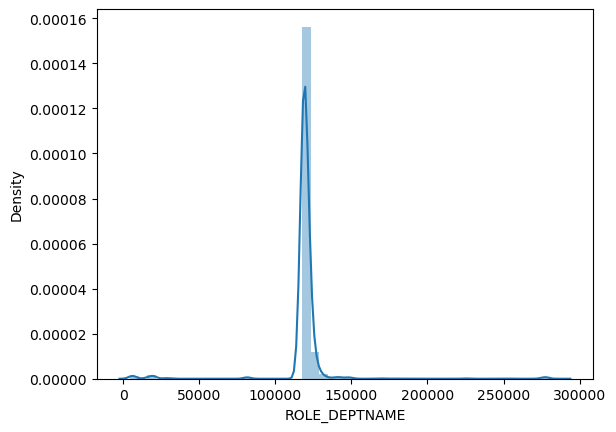

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

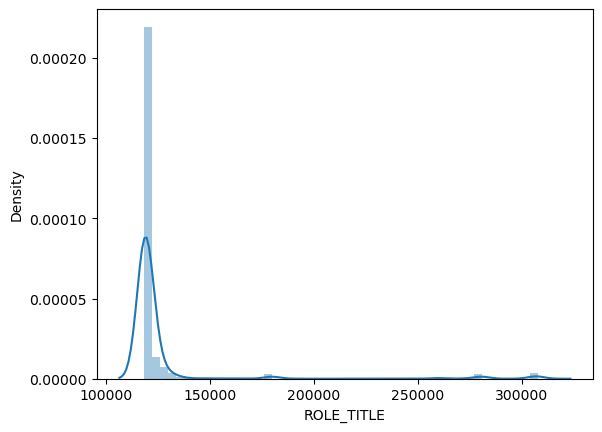

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

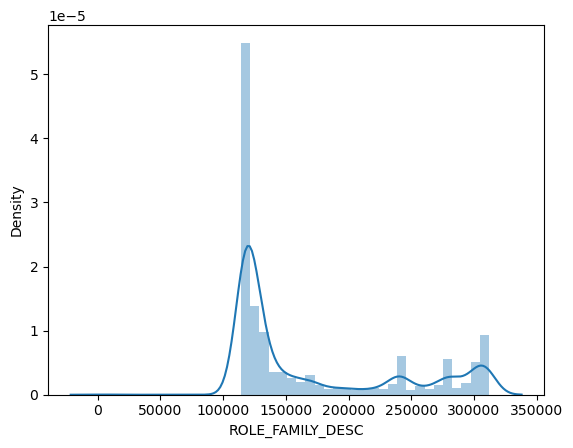

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

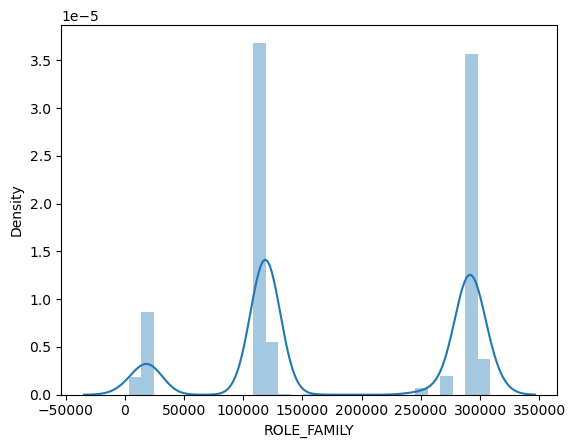

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

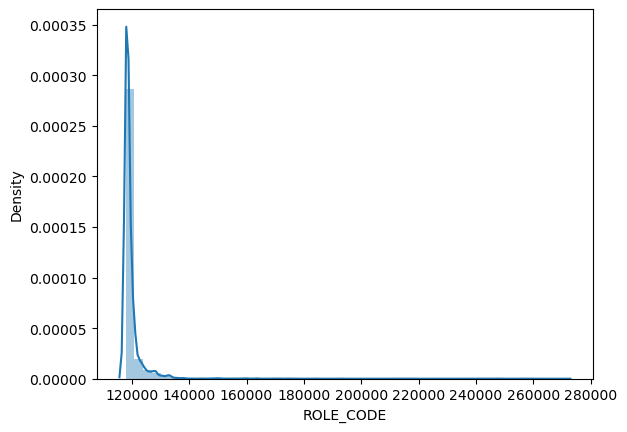

In [34]:
for i in train.describe().columns:
    sns.distplot(train[i].dropna())
    plt.show()

Column: ACTION


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

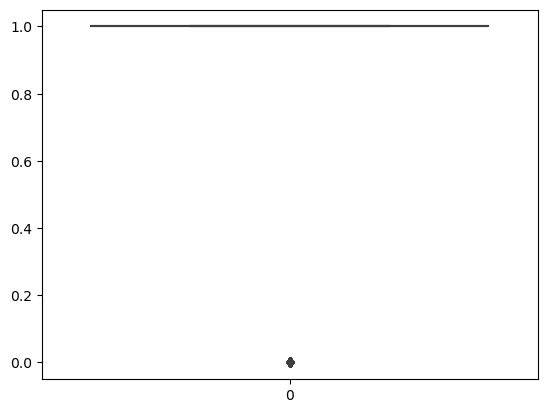

Column: RESOURCE


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

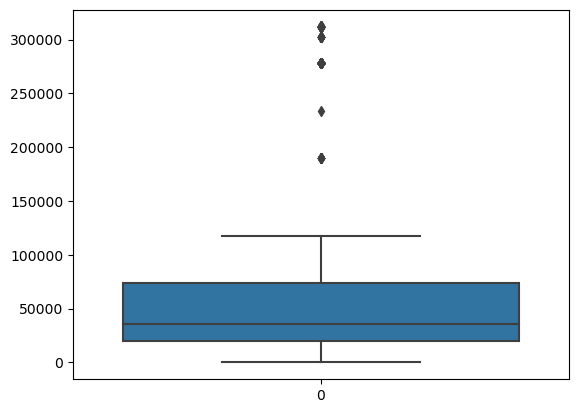

Column: MGR_ID


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

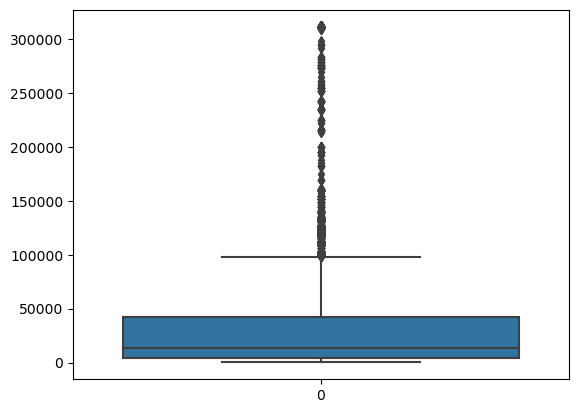

Column: ROLE_ROLLUP_1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

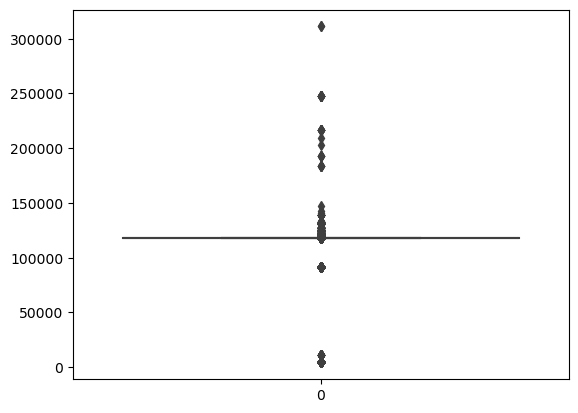

Column: ROLE_ROLLUP_2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

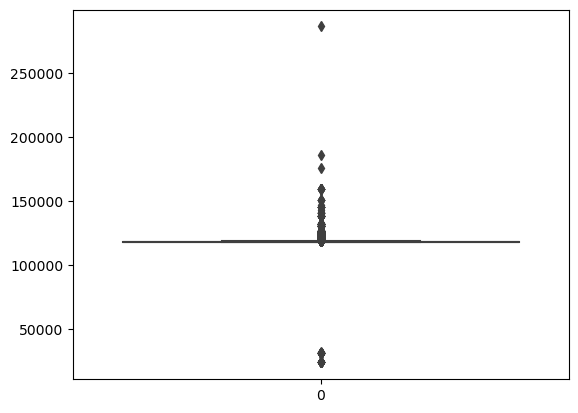

Column: ROLE_DEPTNAME


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

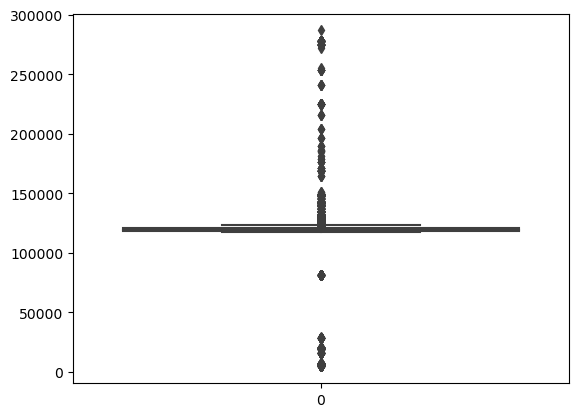

Column: ROLE_TITLE


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

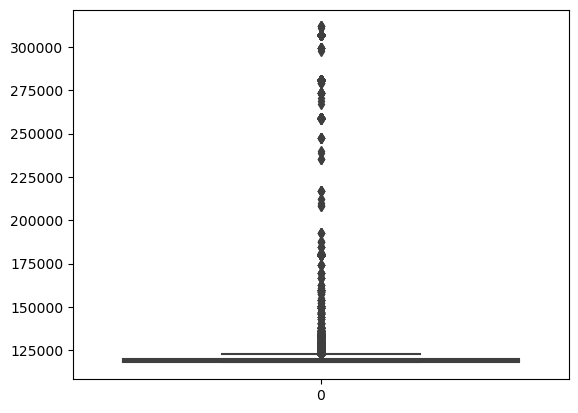

Column: ROLE_FAMILY_DESC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

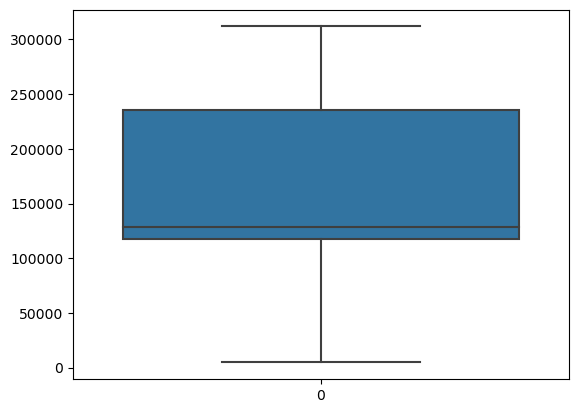

Column: ROLE_FAMILY


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

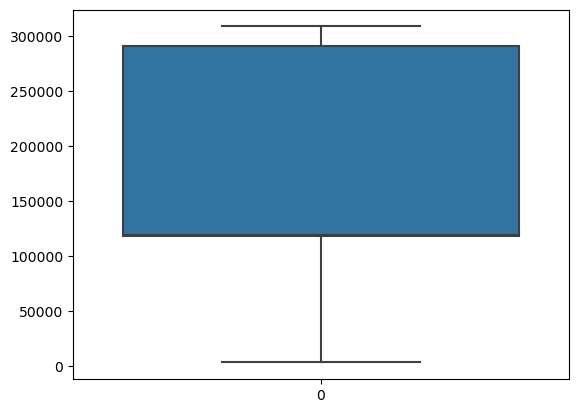

Column: ROLE_CODE


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

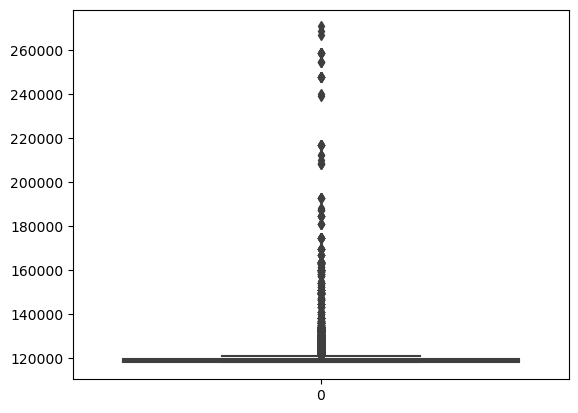

In [39]:
for i in train.describe().columns:
    print("Column:", i)
    sns.boxplot(train[i].dropna())
    plt.show()

In [38]:
train['ACTION'].value_counts() #data is in balance

1    30872
0     1897
Name: ACTION, dtype: int64

In [41]:
train.corr()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'ACTION'),
  Text(0, 1.5, 'RESOURCE'),
  Text(0, 2.5, 'MGR_ID'),
  Text(0, 3.5, 'ROLE_ROLLUP_1'),
  Text(0, 4.5, 'ROLE_ROLLUP_2'),
  Text(0, 5.5, 'ROLE_DEPTNAME'),
  Text(0, 6.5, 'ROLE_TITLE'),
  Text(0, 7.5, 'ROLE_FAMILY_DESC'),
  Text(0, 8.5, 'ROLE_FAMILY'),
  Text(0, 9.5, 'ROLE_CODE')])

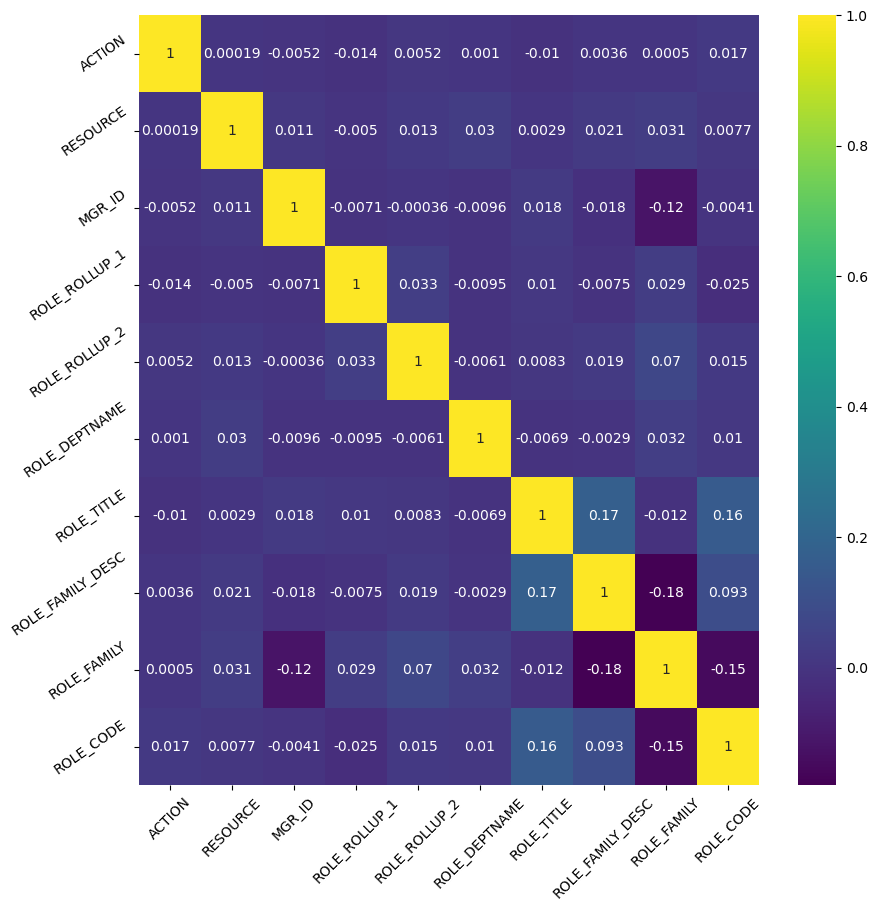

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,cmap='viridis')
plt.xticks(rotation=45)
plt.yticks(rotation=35)

In [48]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [49]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [50]:
y=train['ACTION']
x=train.drop(['ACTION'],axis=1)
x_test=test.drop(['id'],axis=1,inplace=True)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.25,random_state=1)

In [52]:
!pip install catboost

In [53]:
from catboost import CatBoostClassifier

In [59]:
%%time
params={'loss_function':'Logloss',
       'eval_metric':'AUC',
        'verbose':200,
        'random_seed':1}
model=CatBoostClassifier(**params)
model.fit(x_train,y_train,
         eval_set=(x_valid,y_valid),
         use_best_model=True)

Learning rate set to 0.069882
0:	test: 0.5400959	best: 0.5400959 (0)	total: 213ms	remaining: 3m 32s
200:	test: 0.8020842	best: 0.8020842 (200)	total: 8.23s	remaining: 32.7s
400:	test: 0.8237941	best: 0.8237941 (400)	total: 29.6s	remaining: 44.2s
600:	test: 0.8328464	best: 0.8330283 (598)	total: 41.5s	remaining: 27.5s
800:	test: 0.8366271	best: 0.8370599 (785)	total: 49s	remaining: 12.2s
999:	test: 0.8417823	best: 0.8417823 (999)	total: 59.1s	remaining: 0us

bestTest = 0.8417823185
bestIteration = 999

CPU times: total: 1min 15s
Wall time: 1min


In [60]:
x.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [61]:
categorical_values=list(range(x.shape[1]))

In [62]:
categorical_values

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [63]:
%%time
params={'loss_function':'Logloss',
       'eval_metric':'AUC',
        'cat_features':categorical_values,
        'verbose':200,
        'random_seed':1}
model=CatBoostClassifier(**params)
model.fit(x_train,y_train,
         eval_set=(x_valid,y_valid),
         use_best_model=True)

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 225ms	remaining: 3m 45s
200:	test: 0.8955617	best: 0.8955872 (198)	total: 39.5s	remaining: 2m 36s
400:	test: 0.8973364	best: 0.8979162 (365)	total: 1m 23s	remaining: 2m 4s
600:	test: 0.8972380	best: 0.8979162 (365)	total: 2m 4s	remaining: 1m 22s
800:	test: 0.8958290	best: 0.8979581 (706)	total: 2m 52s	remaining: 42.9s
999:	test: 0.8933696	best: 0.8979581 (706)	total: 3m 45s	remaining: 0us

bestTest = 0.8979580831
bestIteration = 706

Shrink model to first 707 iterations.
CPU times: total: 8min 5s
Wall time: 3min 46s


In [68]:
from catboost import Pool, cv


params={'loss_function':'Logloss',
       'eval_metric':'AUC',
        'verbose':200,
        'random_seed':1}

#pool for data set processing
total_train_data=Pool(data=x,
                     label=y,
                     cat_features=categorical_values
                     )

scores=cv(pool=total_train_data,
         params=params,
         fold_count=4,
         seed=1,
         shuffle=True,
         stratified=True)

Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 38.9ms	remaining: 38.8s
200:	test: 0.8938231	best: 0.8938231 (200)	total: 33.2s	remaining: 2m 12s
400:	test: 0.8976765	best: 0.8976765 (400)	total: 1m 14s	remaining: 1m 51s
600:	test: 0.9011808	best: 0.9011808 (600)	total: 1m 53s	remaining: 1m 15s
800:	test: 0.9023208	best: 0.9025750 (791)	total: 2m 27s	remaining: 36.6s
999:	test: 0.9031134	best: 0.9031268 (997)	total: 3m 3s	remaining: 0us

bestTest = 0.9031267986
bestIteration = 997

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 50.9ms	remaining: 50.9s
200:	test: 0.8835559	best: 0.8840146 (166)	total: 35.4s	remaining: 2m 20s
400:	test: 0.8851675	best: 0.8851907 (399)	total: 1m 14s	remaining: 1m 51s
600:	test: 0.8858301	best: 0.8858757 (597)	total: 1m 45s	remaining: 1m 9s
800:	test: 0.8858879	best: 0.8861506 (758)	total: 2m 17s	remaining: 34.1s
999:	test: 0.8846742	best: 0.8861506 (758)	total: 2m 47s	remaining: 0us

bestTest = 0.8861505735
bestI

In [75]:
Important_feature=model.get_feature_importance(prettified=True)
Important_feature

,Feature Id,Importances
0,RESOURCE,19.158482
1,ROLE_DEPTNAME,16.356596
2,MGR_ID,14.578739
3,ROLE_ROLLUP_2,13.220129
4,ROLE_FAMILY_DESC,9.426130
5,ROLE_TITLE,8.148225
6,ROLE_ROLLUP_1,7.256783
7,ROLE_FAMILY,6.647050
8,ROLE_CODE,5.207866


In [76]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Important Feature')

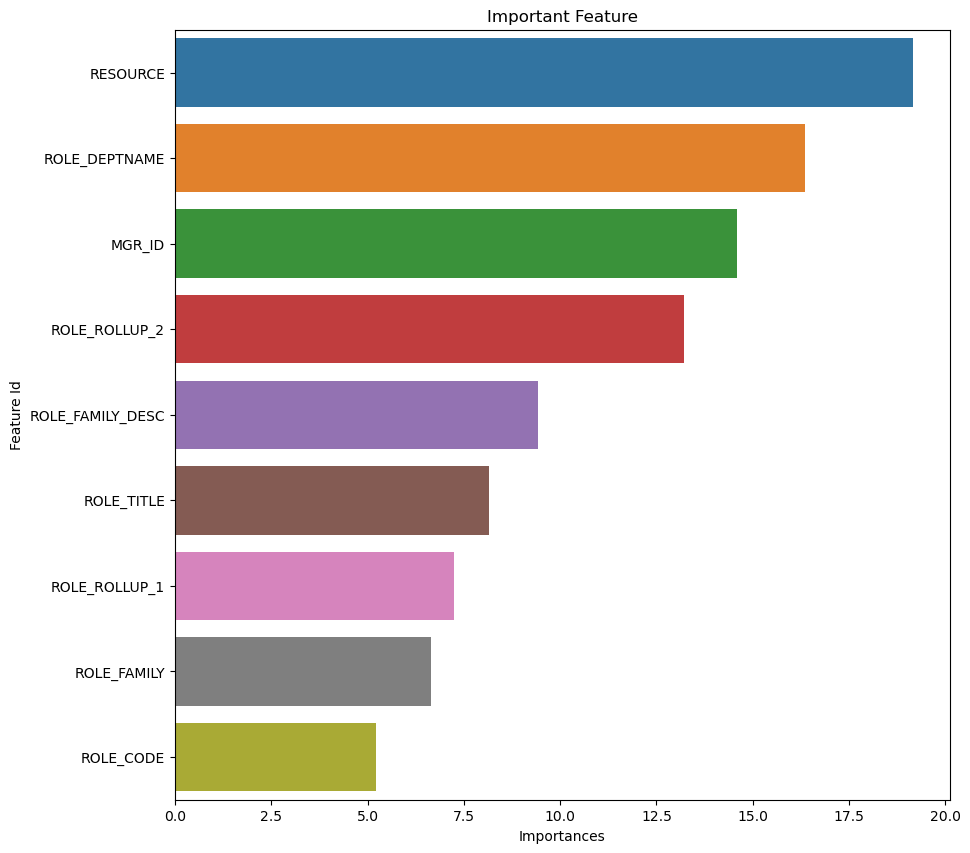

In [84]:
plt.figure(figsize=(10, 10))
sns.barplot(y='Feature Id', x='Importances', data=Important_feature, orient='h')
plt.title('Important Feature')


In [93]:
model.score(x_valid, y_valid)

0.9558159404369584